In [2]:
from src import coil_helpers

import numpy as np

import matplotlib.pyplot as plt
import numpy as np
from src import coil_class as BC

import magpylib as magpy
import matplotlib.ticker as ticker

import scipy.constants as const
from scipy.optimize import curve_fit

In [3]:
def Self_Inductance_Abbot(alpha, beta, gamma, N):
            """
            Formula for self inductance of circular coil by J.J.Abbott
            """
            L = (7.9e-6 * alpha**2 * N**2) / (3*alpha + 9*beta + 10*gamma)
            return L

# Calculate analytically

## low field

In [4]:
radius = radius=65*1e-3
distance=65*1e-3
layers=8
windings=10
I=1

wire_height = .5 *1e-3
wire_width = .5 *1e-3
insulation_thickness = (0.552-0.5)/2 *1e-3

HH_Coil = BC.BCoil(HH = 1, distance = distance*1e3, radius = radius*1e3, layers = layers, windings = windings,
                    wire_height = wire_height*1e3, wire_width = wire_width*1e3, insulation_thickness = insulation_thickness*1e3,
                    is_round = True, winding_scheme= 2)


alpha = 2*HH_Coil.radius
beta = HH_Coil.get_coil_width()
gamma = HH_Coil.get_coil_height()
N = HH_Coil.get_N()
dist = distance*0

L_single = Self_Inductance_Abbot(alpha, dist + beta, gamma, N)
R_single = HH_Coil.get_wire_length() * 0.08708

print(f"R = {R_single} Ohm")
print(f"L = {L_single*1e3} mH")
print(f"tau = {L_single/R_single*1e3} ms")


R = 2.7028704961530403 Ohm
L = 1.605617334411143 mH
tau = 0.5940415335090589 ms


## high field

In [5]:
radius = radius=50*1e-3
distance=50*1e-3
layers=25
windings=11
I=1

wire_height = .5 *1e-3
wire_width = .5 *1e-3
insulation_thickness = (0.552-0.5)/2 *1e-3

HH_Coil = BC.BCoil(HH = 1, distance = distance*1e3, radius = radius*1e3, layers = layers, windings = windings,
                    wire_height = wire_height*1e3, wire_width = wire_width*1e3, insulation_thickness = insulation_thickness*1e3,
                    is_round = True, winding_scheme= 2)


alpha = 2*HH_Coil.radius
beta = HH_Coil.get_coil_width()
gamma = HH_Coil.get_coil_height()
N = HH_Coil.get_N()
dist = distance*0

L_single = Self_Inductance_Abbot(alpha, dist + beta, gamma, N)
R_single = HH_Coil.get_wire_length() * 0.08708

print(f"R = {R_single} Ohm")
print(f"L = {L_single*1e3} mH")
print(f"tau = {L_single/R_single*1e3} ms")

R = 7.194888061621959 Ohm
L = 11.652411339780059 mH
tau = 1.6195403236271104 ms


# Measurement

## low field

tau = 0.5097366740354674 ms


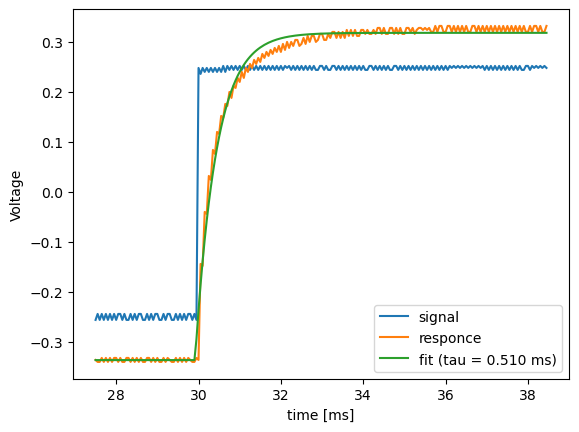

In [5]:
import pandas as pd
import numpy as np

# Load CSV and skip first row if it's a multi-line header
df = pd.read_csv('time_responce_testcoils/NewFile2.csv', skiprows=1)
increment = 5e-5

# Clean up column names if necessary
df.columns = df.columns.str.strip()

# Extract the columns you care about into NumPy arrays
x = df.iloc[:, 0].to_numpy()       # X (Sequence)
ch1 = df.iloc[:, 1].to_numpy()     # CH1 Volt
ch2 = df.iloc[:, 2].to_numpy()     # CH2 Volt

time = x*increment

start = 550
stop = 770

plt.plot(time[start:stop]*1e3,ch1[start:stop], label="signal")
plt.plot(time[start:stop]*1e3,ch2[start:stop], label="responce")
plt.xlabel("time [ms]")
plt.ylabel("Voltage")

def exp_fit(t, tau, t0, A,B):
    res = A*(1-np.exp(-(t-t0)/tau))
    return np.where(res<0,0,res)+ B

p0=[0.003,0.03,0.64,-0.4,]
popt, pcov = curve_fit(exp_fit,time[start:stop], ch2[start:stop],p0=p0)
plt.plot(time[start:stop]*1e3, exp_fit(time[start:stop],*popt),label=f"fit (tau = {popt[0]*1e3:.3f} ms)")
print(f"tau = {popt[0]*1e3} ms")

plt.legend()
plt.show()

tau = 0.5452206023940863 ms


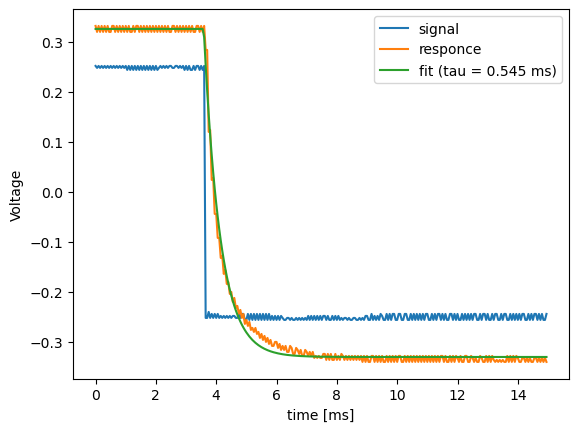

In [6]:
import pandas as pd
import numpy as np

# Load CSV and skip first row if it's a multi-line header
df = pd.read_csv('time_responce_testcoils/NewFile2.csv', skiprows=1)
increment = 5e-5

# Clean up column names if necessary
df.columns = df.columns.str.strip()

# Extract the columns you care about into NumPy arrays
x = df.iloc[:, 0].to_numpy()       # X (Sequence)
ch1 = df.iloc[:, 1].to_numpy()     # CH1 Volt
ch2 = df.iloc[:, 2].to_numpy()     # CH2 Volt

time = x*increment

start = 0
stop = 300

plt.plot(time[start:stop]*1e3,ch1[start:stop], label="signal")
plt.plot(time[start:stop]*1e3,ch2[start:stop], label="responce")
plt.xlabel("time [ms]")
plt.ylabel("Voltage")

def exp_fit(t, tau, t0, A,B):
    res = A*(1-np.exp(-(t-t0)/tau))
    return np.where(res<0,0,-res)+ B

p0=[0.003,0.004,0.64,0.4,]
popt, pcov = curve_fit(exp_fit,time[start:stop], ch2[start:stop],p0=p0)
plt.plot(time[start:stop]*1e3, exp_fit(time[start:stop],*popt),label=f"fit (tau = {popt[0]*1e3:.3f} ms)")
print(f"tau = {popt[0]*1e3} ms")

plt.legend()
plt.show()

### with PI-control

tau = 0.007814569602245835 ms


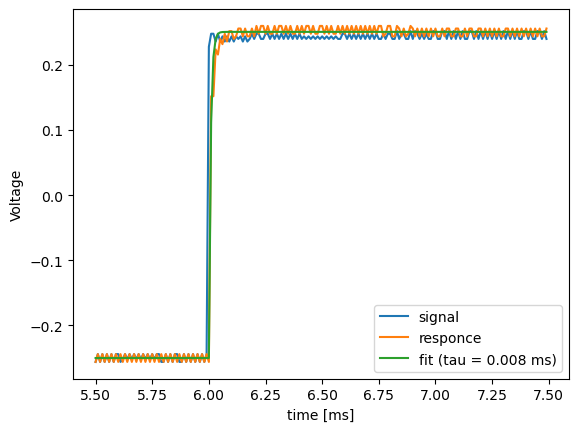

In [7]:
# Load CSV and skip first row if it's a multi-line header
df = pd.read_csv('time_responce_testcoils/NewFile5.csv', skiprows=1)
increment = 1e-5

# Clean up column names if necessary
df.columns = df.columns.str.strip()

# Extract the columns you care about into NumPy arrays
x = df.iloc[:, 0].to_numpy()       # X (Sequence)
ch1 = df.iloc[:, 1].to_numpy()     # CH1 Volt
ch2 = df.iloc[:, 2].to_numpy()     # CH2 Volt

time = x*increment

start = 550
stop = 750

plt.plot(time[start:stop]*1e3,ch1[start:stop], label="signal")
plt.plot(time[start:stop]*1e3,ch2[start:stop], label="responce")
plt.xlabel("time [ms]")
plt.ylabel("Voltage")

def exp_fit(t, tau, t0, A,B):
    res = A*(1-np.exp(-(t-t0)/tau))
    return np.where(res<0,0,res)+ B

p0=[0.003,0.006,0.64,-0.4,]
popt, pcov = curve_fit(exp_fit,time[start:stop], ch2[start:stop],p0=p0)
plt.plot(time[start:stop]*1e3, exp_fit(time[start:stop],*popt),label=f"fit (tau = {popt[0]*1e3:.3f} ms)")
print(f"tau = {popt[0]*1e3} ms")

plt.legend()
plt.show()

## high field

tau = 1.5308889002187382 ms


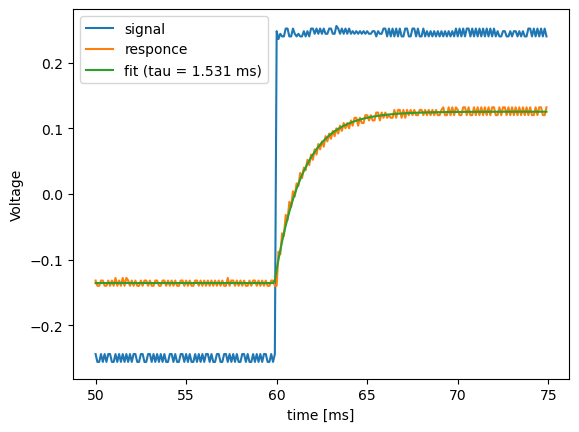

In [8]:
import pandas as pd
import numpy as np

# Load CSV and skip first row if it's a multi-line header
df = pd.read_csv('time_responce_testcoils/NewFile3.csv', skiprows=1)
increment = 1e-4

# Clean up column names if necessary
df.columns = df.columns.str.strip()

# Extract the columns you care about into NumPy arrays
x = df.iloc[:, 0].to_numpy()       # X (Sequence)
ch1 = df.iloc[:, 1].to_numpy()     # CH1 Volt
ch2 = df.iloc[:, 2].to_numpy()     # CH2 Volt

time = x*increment

start = 500
stop = 750

plt.plot(time[start:stop]*1e3,ch1[start:stop], label="signal")
plt.plot(time[start:stop]*1e3,ch2[start:stop], label="responce")
plt.xlabel("time [ms]")
plt.ylabel("Voltage")



def exp_fit(t, tau, t0, A,B):
    res = A*(1-np.exp(-(t-t0)/tau))
    return np.where(res<0,0,res)+ B

p0=[0.008,0.06,0.3,-0.13]
popt, pcov = curve_fit(exp_fit,time[start:stop], ch2[start:stop],p0=p0)
plt.plot(time[start:stop]*1e3, exp_fit(time[start:stop],*popt),label=f"fit (tau = {popt[0]*1e3:.3f} ms)")
print(f"tau = {popt[0]*1e3} ms")

plt.legend()
plt.show()

### with PI-control

tau = 0.12373891080680194 ms


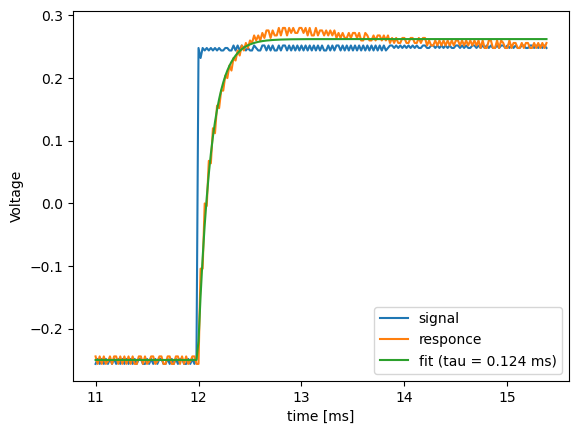

In [9]:
# Load CSV and skip first row if it's a multi-line header
df = pd.read_csv('time_responce_testcoils/NewFile4.csv', skiprows=1)
increment = 2e-5

# Clean up column names if necessary
df.columns = df.columns.str.strip()

# Extract the columns you care about into NumPy arrays
x = df.iloc[:, 0].to_numpy()       # X (Sequence)
ch1 = df.iloc[:, 1].to_numpy()     # CH1 Volt
ch2 = df.iloc[:, 2].to_numpy()     # CH2 Volt

time = x*increment

start = 550
stop = 770

plt.plot(time[start:stop]*1e3,ch1[start:stop], label="signal")
plt.plot(time[start:stop]*1e3,ch2[start:stop], label="responce")
plt.xlabel("time [ms]")
plt.ylabel("Voltage")

def exp_fit(t, tau, t0, A,B):
    res = A*(1-np.exp(-(t-t0)/tau))
    return np.where(res<0,0,res)+ B

p0=[0.003,0.006,0.64,-0.4,]
popt, pcov = curve_fit(exp_fit,time[start:stop], ch2[start:stop],p0=p0)
plt.plot(time[start:stop]*1e3, exp_fit(time[start:stop],*popt),label=f"fit (tau = {popt[0]*1e3:.3f} ms)")
print(f"tau = {popt[0]*1e3} ms")

plt.legend()
plt.show()